# Homework - Week 6
# Answers

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
import pymysql
import json

In [6]:
server = "analyst-toolbelt.cn119w37trlg.eu-west-1.rds.amazonaws.com"
username = "emlyon1"
password = "student1"

In [7]:
#Q1: connect to the bdd tweets on the SQL server and show the different tables
#Hint "SHOW tables" is the sql query to show the tables... 

In [8]:
connection = pymysql.connect(host=server,
                             user=username,
                             password=password,
                             db='tweets',
                             charset='utf8')

pd.read_sql('show tables', connection)

,Tables_in_tweets
0,adobe
1,capgemini
2,cisco
3,forrester
4,generalelectric
5,intel
6,oracle
7,salesforce


In [9]:
# We are going to explore the Capgemini database

In [10]:
capgemini = pd.read_sql('SELECT * from capgemini',connection)
capgemini.head(1)

,date,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,...,user,hashtags,tweeter_followers,tweeter_listed,urls_found,name_mentions,tweeter_following,tweeter_desc,tweeter_name,tweeter_id
0,2017-02-24,,,Fri Feb 24 00:24:06 +0000 2017,"{'urls': [{'indices': [90, 113], 'display_url'...",{'media': [{'source_status_id': 82063043931242...,0,False,,834921810361630720,...,"{'notifications': None, 'followers_count': 518...","CustomerCentricity,MarginErosion,nrf17",5180,3590,http://ow.ly/Avqm307pidP,Capgemini,350,I feel the need to leave the world better than...,andytoronto,79201672


In [11]:
#Q2: count how many times each hashtag occurs in table capgemini
# Return the result in a dictionnary with keys = hashtags and  values = number of occurences

In [12]:
#Q2 - 1:  Return the column entities as a list of dictionnaries 
# Hint: To transform a string into a dict, use json.loads(string)
#       Here necessary to replace ' by " in strings before using json.loads()

In [13]:
query = 'select entities from capgemini'

df = pd.read_sql(query, connection)

df.head()

,entities
0,"{'urls': [{'indices': [90, 113], 'display_url'..."
1,"{'urls': [{'indices': [117, 140], 'display_url..."
2,"{'urls': [{'indices': [115, 138], 'display_url..."
3,"{'urls': [], 'user_mentions': [{'indices': [3,..."
4,"{'urls': [{'indices': [109, 132], 'display_url..."


In [14]:
entities = [json.loads(df.loc[i,'entities'].replace("'",'"')) for i in range(len(df))]


In [15]:
entities

[{'hashtags': [{'indices': [37, 56], 'text': 'CustomerCentricity'},
   {'indices': [65, 79], 'text': 'MarginErosion'},
   {'indices': [83, 89], 'text': 'nrf17'}],
  'media': [{'display_url': 'pic.twitter.com/oRDJElhvGv',
    'expanded_url': 'https://twitter.com/Capgemini/status/820630439312429057/photo/1',
    'id': 820630437089411073,
    'id_str': '820630437089411073',
    'indices': [114, 137],
    'media_url': 'http://pbs.twimg.com/media/C2N3CN6WgAECcXI.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/C2N3CN6WgAECcXI.jpg',
    'sizes': {'large': {'h': 450, 'resize': 'fit', 'w': 750},
     'medium': {'h': 450, 'resize': 'fit', 'w': 750},
     'small': {'h': 408, 'resize': 'fit', 'w': 680},
     'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
    'source_status_id': 820630439312429057,
    'source_status_id_str': '820630439312429057',
    'source_user_id': 14109159,
    'source_user_id_str': '14109159',
    'type': 'photo',
    'url': 'https://t.co/oRDJElhvGv'}],
  'symbol

In [16]:
#Q2 - 2 : Count how many times each hashtag occurs in table capgemini

In [17]:
hashtags = {}
for i in range(len(entities)):
    for h in entities[i]['hashtags']:
        if h['text'] in hashtags.keys():
            hashtags[h['text']] += 1
        else:
            hashtags[h['text']] = 1

In [18]:
#Q3: Sort the dictionnary found in Q2 (Return a dictionnary too)
#Hint: You can use the function sorted()

In [19]:
sorted_hashtags = dict(sorted(hashtags.items(), key = lambda x:x[1], reverse = True))

In [20]:
from collections import OrderedDict
from operator import itemgetter

In [25]:
OrderedDict(sorted_hashtags, key=itemgetter(1))

OrderedDict([('InnovatorsRace50', 103),
             ('contentloop', 57),
             ('AI', 34),
             ('AppliedInnovation', 33),
             ('Analytics', 28),
             ('startup', 28),
             ('startups', 23),
             ('APIs', 22),
             ('techtrends', 22),
             ('innovation', 21),
             ('DevOps', 21),
             ('Fintech', 21),
             ('Banking', 21),
             ('uber', 20),
             ('payments', 19),
             ('CloudChoice', 19),
             ('cybersecurity', 19),
             ('BigData', 18),
             ('Insurtech', 18),
             ('vivatech', 17),
             ('Trends', 17),
             ('Robotics', 17),
             ('digital', 16),
             ('Startup', 16),
             ('airbus', 16),
             ('retailers', 15),
             ('trends', 15),
             ('Innovation', 14),
             ('cloud', 14),
             ('IoT', 13),
             ('defih', 13),
             ('bigdata', 12),
          

In [15]:
#Q4: Plot the ten most used hashtags (decreasingly)

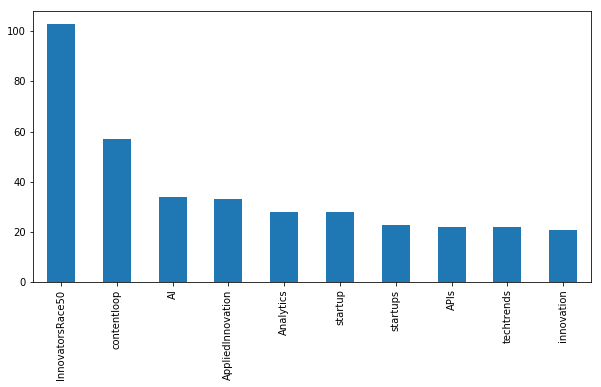

In [29]:
pd.core.series.Series(sorted_hashtags, index=sorted_hashtags.keys()).iloc[:10].plot(kind = 'bar', figsize = (10,5))

In [30]:
#Q5: find the languages which are used and the number of tweet in each
# Explore the database to find where you can find information about language
# or use the twitter documentation https://dev.twitter.com/overview/api/tweets

In [26]:
languages = {}
for i in range(len(capgemini)):
    if capgemini.loc[i,'lang'] in languages.keys():
        languages[capgemini.loc[i,'lang']] += 1
    else:
        languages[capgemini.loc[i,'lang']] = 1

In [49]:
languages

{'cy': 2,
 'de': 6,
 'en': 903,
 'es': 11,
 'fr': 93,
 'ht': 4,
 'in': 4,
 'it': 13,
 'nl': 2,
 'pt': 11,
 'sv': 3,
 'tl': 1,
 'und': 12}

In [43]:
#Q6: Plot the most used languages (decreasingly)

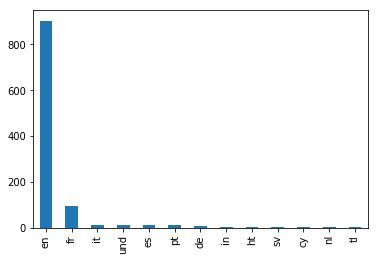

In [54]:
pd.core.series.Series(languages,index=languages.keys()).sort_values(ascending = False).plot(kind = 'bar')

In [57]:
import urllib, json

In [58]:
URL = "https://data.sncf.com/api/records/1.0/search/?dataset=regularite-mensuelle-ter&rows=1140&sort=date&facet=date&facet=region"

In [59]:
#Q7: Get a DataFrame similar to the array you can find on the following website
# using the URL given to import data
# Hint: to transform a list of dict into a dataframe, use pd.DataFrame(list_dicts)

# Only the first ten rows are imported

https://data.sncf.com/explore/dataset/regularite-mensuelle-ter/table/?disjunctive.region&sort=date

In [60]:
with urllib.request.urlopen(URL) as url:
    data = json.loads(url.read())
    print(data)

{'nhits': 1140, 'parameters': {'dataset': ['regularite-mensuelle-ter'], 'timezone': 'UTC', 'rows': 1140, 'sort': ['date'], 'format': 'json', 'facet': ['date', 'region']}, 'records': [{'datasetid': 'regularite-mensuelle-ter', 'recordid': 'daca0e25905e4eee65c604818ec58e281e1ea8f9', 'fields': {'nombre_de_trains_programmes': 9688, 'taux_de_ponctualite': 88.8, 'region': 'Aquitaine', 'nombre_de_trains_en_retard_a_l_arrivee': 1060, 'nombre_de_trains_ayant_circule': 9497, 'nombre_de_trains_annules': 191, 'commentaires': 'Dans la lignée de septembre, un mois d’octobre difficile pour la production. Cela s’explique par la tension persistante sur le parc qui génère des sous-compositions notamment en zone périgourdine et en Sud Aquitaine, et d’autre part  la fiabilité des engins et les tensions sur la ressource ADC. Toutes ces causes combinées entraînent une désorganisation du service.', 'date': '2017-10', 'nombre_de_trains_a_lheure_pour_un_train_en_retard_a_larrivee': 8.0, 'id': 'TER_2'}, 'record_

In [61]:
data.keys()

dict_keys(['nhits', 'parameters', 'records', 'facet_groups'])

In [62]:
pd.DataFrame(data['records'])

,datasetid,fields,record_timestamp,recordid
0,regularite-mensuelle-ter,"{'nombre_de_trains_programmes': 9688, 'taux_de...",2017-11-24T09:33:44+00:00,daca0e25905e4eee65c604818ec58e281e1ea8f9
1,regularite-mensuelle-ter,"{'nombre_de_trains_programmes': 6010, 'taux_de...",2017-11-24T09:33:44+00:00,94b87b16d38ffecb111e6b0305ebb38be381f6af
2,regularite-mensuelle-ter,"{'nombre_de_trains_programmes': 4742, 'nombre_...",2017-11-24T09:33:44+00:00,1ae9fc338a31b4bed75c7df42a1d20477ef8bc10
3,regularite-mensuelle-ter,"{'date': '2017-10', 'region': 'Bourgogne', 'id...",2017-11-24T09:33:44+00:00,b156dab7c9479f480e714c87df1b99da826dc1bb
4,regularite-mensuelle-ter,"{'nombre_de_trains_programmes': 28892, 'nombre...",2017-11-24T09:33:44+00:00,9c30151296de36611eaf78f1dab7359dc151fe52
5,regularite-mensuelle-ter,"{'date': '2017-10', 'region': 'Picardie', 'id'...",2017-11-24T09:33:44+00:00,83d93a8bba3b61e82321689d46f9e8eb2a9f1902
6,regularite-mensuelle-ter,"{'nombre_de_trains_programmes': 3247, 'taux_de...",2017-11-24T09:33:44+00:00,bdcb5f531c3fe5e511edd087b6e54f63f2da3da1
7,regularite-mensuelle-ter,"{'nombre_de_trains_programmes': 44420, 'taux_d...",2017-11-24T09:33:44+00:00,97ff1bb805e134acb73d783c11fe7eb4b0407155
8,regularite-mensuelle-ter,"{'nombre_de_trains_programmes': 13036, 'nombre...",2017-11-24T09:33:44+00:00,80df96afc264be553e5dc4a86df9337d888dc3cd
9,regularite-mensuelle-ter,"{'date': '2017-10', 'region': 'Languedoc Rouss...",2017-11-24T09:33:44+00:00,a547f8f59882f33d9b2b0dd55fbf048147fd1449


In [63]:
new_df = pd.DataFrame(list(pd.DataFrame(data['records'])['fields']))

In [64]:
new_df.head()

,commentaires,date,id,nombre_de_trains_a_lheure_pour_un_train_en_retard_a_larrivee,nombre_de_trains_annules,nombre_de_trains_ayant_circule,nombre_de_trains_en_retard_a_l_arrivee,nombre_de_trains_programmes,region,taux_de_ponctualite
0,"Dans la lignée de septembre, un mois d’octobre...",2017-10,TER_2,8.0,191.0,9497.0,1060.0,9688.0,Aquitaine,88.8
1,Un mois marqué par des dérangements d'installa...,2017-10,TER_10,14.9,65.0,5945.0,375.0,6010.0,Haute Normandie,93.7
2,NaN,2017-10,TER_3,13.6,59.0,4683.0,321.0,4742.0,Auvergne,93.1
3,NaN,2017-10,TER_5,NaN,NaN,NaN,NaN,NaN,Bourgogne,NaN
4,NaN,2017-10,TER_20,7.3,452.0,28440.0,3408.0,28892.0,Rhône Alpes,88.0
